–ù–∞—á–Ω–µ–º —Å –∏–º–ø–æ—Ä—Ç–∞ –Ω—É–∂–Ω—ã—Ö –Ω–∞–º –±–∏–±–ª–∏–æ—Ç–µ–∫.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder


## –î–∞–Ω–Ω—ã–µ

In [2]:
data_xlsx = pd.read_excel('first_practice_dataframe.xlsx')
# 8 –≤–∞—Ä–∏–∞–Ω—Ç
data = data_xlsx[['cat11_nationality', 'cat14_temprature', 'num1_8', 'num2_8', 'num3_8']]
data

cat11_nationality cat14_temprature      num1_8      num2_8      num3_8
0              german         Very Hot  247.159357  233.346229  731.516449
1              German             cold  668.812973   96.173995  726.139127
2              german         Very Hot  236.218871    1.799639  742.322785
3              German         Very Hot  989.929212  526.862875  767.297661
4              german             cold   88.636793   64.834346  767.944298
..                ...              ...         ...         ...         ...
995            French         Very Hot  693.456750   62.973627  756.731417
996            German             cold  172.961735   64.458428  713.537068
997            German         Very Hot  196.283378   33.545698  750.001161
998            German                - -133.377671  426.799833  729.385345
999            German             cold  -72.979302  464.629839  732.606965

[1000 rows x 5 columns]

## 1. –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

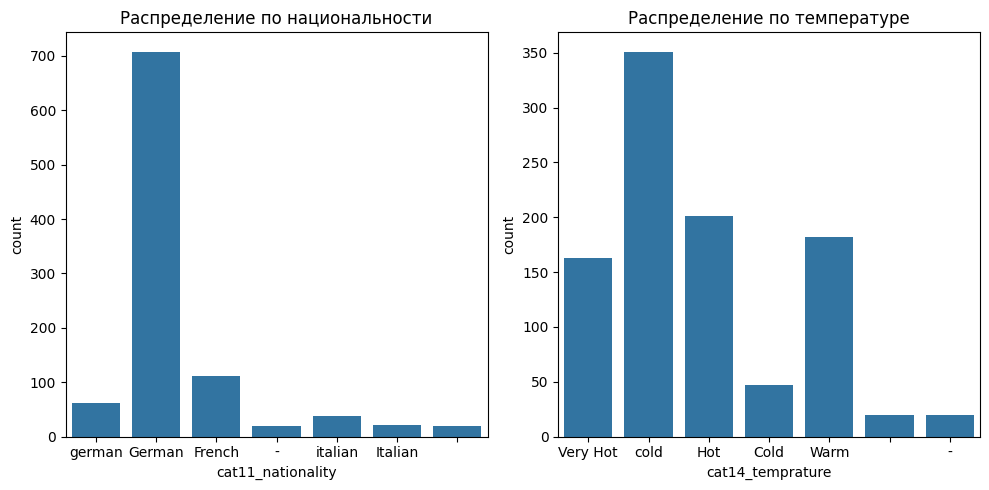

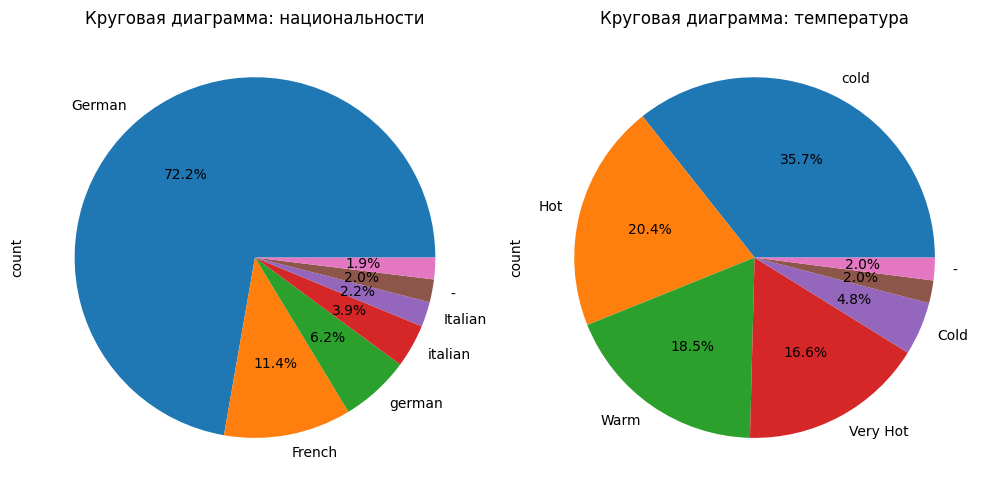

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='cat11_nationality', data=data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏')
plt.subplot(1, 2, 2)
sns.countplot(x='cat14_temprature', data=data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['cat11_nationality'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('–ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞: –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏')
plt.subplot(1, 2, 2)
data['cat14_temprature'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('–ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞: —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞')
plt.tight_layout()
plt.show()

### –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞, –æ—Ü–µ–Ω–∫–∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –¥–∏–∞–≥—Ä–∞–º–º–∞ ¬´—è—â–∏–∫ —Å —É—Å–∞–º–∏¬ª –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

/tmp/ipykernel_46358/1191811256.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy[column] = data_copy[column].replace([r'^\s+$', r'-'], np.nan, regex=True)


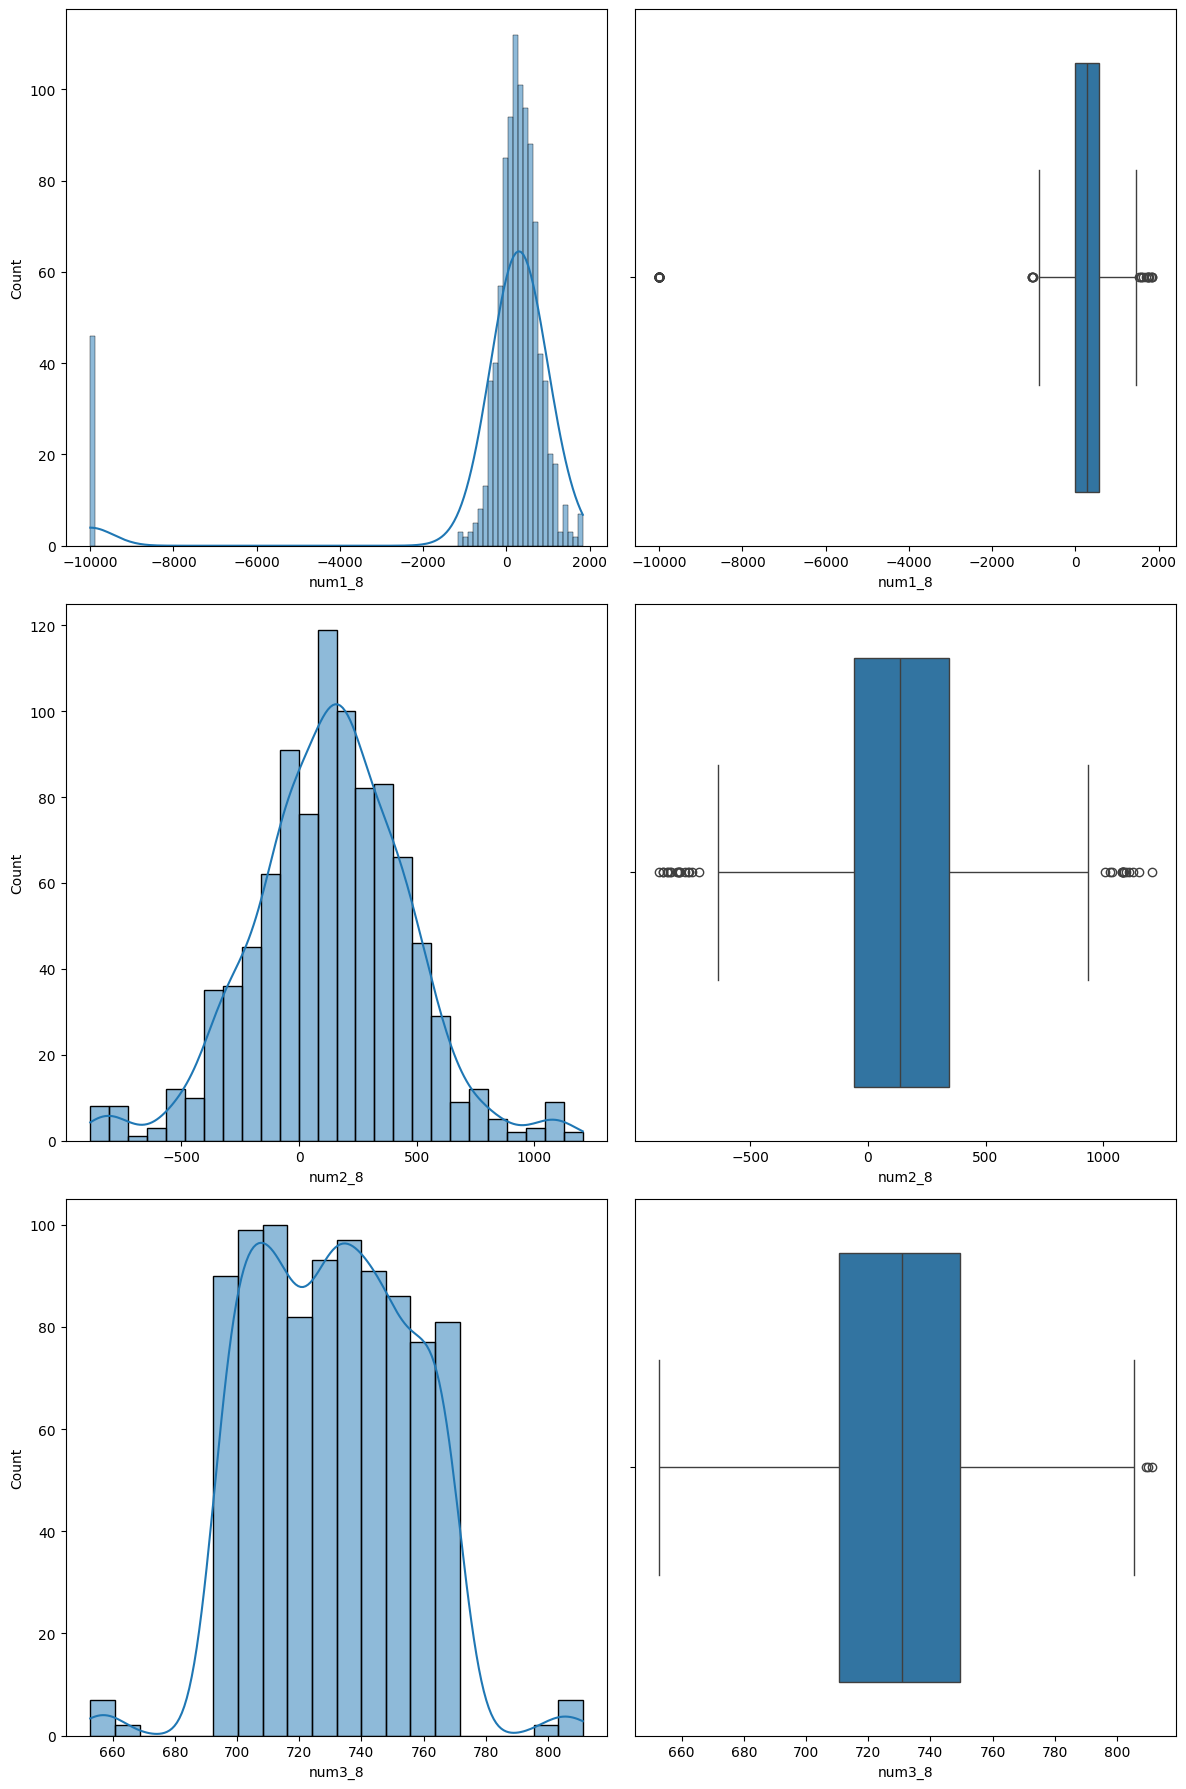

In [4]:
data_copy = data.copy(deep=True)

columns = ['num1_8', 'num2_8', 'num3_8']
for column in columns:
    # –ó–∞–º–µ–Ω–∞ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ –∏ —Å–∏–º–≤–æ–ª–æ–≤ '-' –Ω–∞ NaN
   data_copy[column] = data_copy[column].replace([r'^\s+$', r'-'], np.nan, regex=True)



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

axes_iterator = iter(axes.flatten())
 
for column in columns:
    sns.histplot(data=data_copy, x=column, kde=True, ax=next(axes_iterator))
    sns.boxplot(x=data_copy[column], ax=next(axes_iterator))

plt.tight_layout()
plt.show()

## 2. –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö

In [5]:
data = data.copy(deep=True)
data['cat11_nationality'] = data['cat11_nationality'].str.upper()
data['cat14_temprature'] = data['cat14_temprature'].str.upper()
# –ó–∞–º–µ–Ω–∞ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö 'cat11_nationality' –∏ 'cat14_temprature' –Ω–∞ NaN

for col in ['cat11_nationality', 'cat14_temprature']:
    # –ó–∞–º–µ–Ω–∞ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ –∏ —Å–∏–º–≤–æ–ª–æ–≤ '-' –Ω–∞ NaN –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö 'cat11_nationality', 'cat14_temprature'
    data[col] = data[col].replace([r'^\s+$', r'-'], np.nan, regex=True)
    data_filter = ~data[col].astype(str).str.isalpha() # 1 –µ—Å–ª–∏ –µ—Å—Ç—å –±—É–∫–≤–µ–Ω–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã, 0 –µ—Å–ª–∏ —Ö–æ—Ç—è –±—ã 1 –Ω–µ –±—É–∫–≤–µ–Ω–Ω—ã–π
    data.loc[data_filter, col] = np.nan

# –ó–∞–º–µ–Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–π -9999 –Ω–∞ NaN –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö 'num1_8', 'num2_8', 'num3_8'
data[['num1_8', 'num2_8', 'num3_8']] = data[['num1_8', 'num2_8', 'num3_8']].replace(-9999, np.nan)

# –ó–∞–º–µ–Ω–∞ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ –∏ —Å–∏–º–≤–æ–ª–æ–≤ '-' –Ω–∞ NaN –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö 'num1_8', 'num2_8', 'num3_8'
for col in ['num1_8', 'num2_8', 'num3_8']:
    data[col] = data[col].replace([r'^\s+$', r'-'], np.nan, regex=True)

data

/tmp/ipykernel_46358/748221793.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace([r'^\s+$', r'-'], np.nan, regex=True)


cat11_nationality cat14_temprature      num1_8      num2_8      num3_8
0              GERMAN              NaN  247.159357  233.346229  731.516449
1              GERMAN             COLD  668.812973   96.173995  726.139127
2              GERMAN              NaN  236.218871    1.799639  742.322785
3              GERMAN              NaN  989.929212  526.862875  767.297661
4              GERMAN             COLD   88.636793   64.834346  767.944298
..                ...              ...         ...         ...         ...
995            FRENCH              NaN  693.456750   62.973627  756.731417
996            GERMAN             COLD  172.961735   64.458428  713.537068
997            GERMAN              NaN  196.283378   33.545698  750.001161
998            GERMAN              NaN -133.377671  426.799833  729.385345
999            GERMAN             COLD  -72.979302  464.629839  732.606965

[1000 rows x 5 columns]

## 3. –ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [6]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ—Ä–æ–≥ –¥–ª—è —Å–∏–≥–º
threshold = 3

# –ü—Ä–∏–º–µ–Ω—è–µ–º –º–µ—Ç–æ–¥ —Å–∏–≥–º –∏ —É–¥–∞–ª—è–µ–º –∏–∑ data –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
c, low, upp = sc.stats.sigmaclip(data['num1_8'].dropna(), threshold, threshold)

data_cleaned_sigma = data[(data['num1_8'] >= low) & (data['num1_8'] <= upp)]
data_bad_values = data[(data['num1_8'] <= low) | (data['num1_8'] >= upp)]

# –ú–µ—Ç–æ–¥ –∫–≤–∞—Ä—Ç–∏–ª–µ–π
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR
    upper_bound = Q3 + IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data_cleaned_iqr = remove_outliers_iqr(data, 'num1_8')


print('üóø sigma moment üóø\n', data_cleaned_sigma)
print('IQR\n', data_cleaned_iqr)

üóø sigma moment üóø
     cat11_nationality cat14_temprature      num1_8      num2_8      num3_8
0              GERMAN              NaN  247.159357  233.346229  731.516449
1              GERMAN             COLD  668.812973   96.173995  726.139127
2              GERMAN              NaN  236.218871    1.799639  742.322785
3              GERMAN              NaN  989.929212  526.862875  767.297661
4              GERMAN             COLD   88.636793   64.834346  767.944298
..                ...              ...         ...         ...         ...
995            FRENCH              NaN  693.456750   62.973627  756.731417
996            GERMAN             COLD  172.961735   64.458428  713.537068
997            GERMAN              NaN  196.283378   33.545698  750.001161
998            GERMAN              NaN -133.377671  426.799833  729.385345
999            GERMAN             COLD  -72.979302  464.629839  732.606965

[938 rows x 5 columns]
IQR
     cat11_nationality cat14_temprature      num

## 4. –ü–æ–∏—Å–∫ –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [7]:
data_cleaned_sigma.reset_index(drop=True, inplace=True)

data = data_cleaned_sigma

# –ü–æ–∏—Å–∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
missing_data = data.isnull().sum()
print("–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º\n", missing_data)
ohe = OneHotEncoder(drop='first', sparse_output=False)
 
encoded_data = pd.DataFrame(ohe.fit_transform(data[['cat11_nationality']]))
encoded_data.columns = ohe.get_feature_names_out()
 
data_onehot = data.join(encoded_data)
data_onehot.drop('cat11_nationality', axis = 1, inplace = True)
encoded_values = encoded_data.to_numpy()
data_onehot['cat11_nationality'] = list(map(lambda x: np.argmax(x), encoded_values))
data_onehot.drop(encoded_data.columns, axis=1, inplace=True)

print(data_onehot)
data = data_onehot

# –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
# K –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
imputer = KNNImputer(n_neighbors=5)
features = ['cat11_nationality', 'num1_8']
data['cat11_nationality'] = imputer.fit_transform(data[features])


# –ó–∞–º–µ–Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å–∞–º—ã–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
data['cat14_temprature'] = data['cat14_temprature'].fillna(data['cat14_temprature'].mode()[0])

# –ó–∞–º–µ–Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è —Ç—Ä–µ—Ç—å–µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
data['num1_8'] = data['num1_8'].fillna(data['num1_8'].mean())

# –ó–∞–º–µ–Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –º–µ–¥–∏–∞–Ω–æ–π –¥–ª—è —á–µ—Ç–≤–µ—Ä—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
data['num2_8'] = data['num2_8'].fillna(data['num2_8'].median())

# K –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –¥–ª—è –ø—è—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
data['num3_8'] = imputer.fit_transform(data[['num3_8']])

data


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º
 cat11_nationality     54
cat14_temprature     206
num1_8                 0
num2_8                45
num3_8                79
dtype: int64
    cat14_temprature      num1_8      num2_8      num3_8  cat11_nationality
0                NaN  247.159357  233.346229  731.516449                  0
1               COLD  668.812973   96.173995  726.139127                  0
2                NaN  236.218871    1.799639  742.322785                  0
3                NaN  989.929212  526.862875  767.297661                  0
4               COLD   88.636793   64.834346  767.944298                  0
..               ...         ...         ...         ...                ...
933              NaN  693.456750   62.973627  756.731417                  0
934             COLD  172.961735   64.458428  713.537068                  0
935              NaN  196.283378   33.545698  750.001161                  0
936              NaN -133.377671 

cat14_temprature      num1_8      num2_8      num3_8  cat11_nationality
0               COLD  247.159357  233.346229  731.516449                0.0
1               COLD  668.812973   96.173995  726.139127                0.0
2               COLD  236.218871    1.799639  742.322785                0.0
3               COLD  989.929212  526.862875  767.297661                0.0
4               COLD   88.636793   64.834346  767.944298                0.0
..               ...         ...         ...         ...                ...
933             COLD  693.456750   62.973627  756.731417                0.0
934             COLD  172.961735   64.458428  713.537068                0.0
935             COLD  196.283378   33.545698  750.001161                0.0
936             COLD -133.377671  426.799833  729.385345                0.0
937             COLD  -72.979302  464.629839  732.606965                0.0

[938 rows x 5 columns]

## 5. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [8]:

# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
label_encoder = LabelEncoder()
data[['num1_8', 'num2_8', 'num3_8']] = scaler.fit_transform(data[['num1_8', 'num2_8', 'num3_8']])
data[['num1_8', 'num2_8', 'num3_8']] = minmax_scaler.fit_transform(data[['num1_8', 'num2_8', 'num3_8']])

# One-hot encoding –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ cat16_city
#cat16_encoded = one_hot_encoder.fit_transform(data[['cat16_city']]).toarray()

# Label encoding –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ cat11_nationality
data['cat14_temprature'] = label_encoder.fit_transform(data['cat14_temprature'])

data

cat14_temprature    num1_8    num2_8    num3_8  cat11_nationality
0                   0  0.466800  0.535214  0.497087                0.0
1                   0  0.641417  0.469732  0.463114                0.0
2                   0  0.462269  0.424680  0.565360                0.0
3                   0  0.774400  0.675331  0.723148                0.0
4                   0  0.401152  0.454771  0.727233                0.0
..                ...       ...       ...       ...                ...
933                 0  0.651623  0.453883  0.656392                0.0
934                 0  0.436073  0.454592  0.383496                0.0
935                 0  0.445731  0.439835  0.613871                0.0
936                 0  0.309210  0.627563  0.483623                0.0
937                 0  0.334222  0.645622  0.503977                0.0

[938 rows x 5 columns]

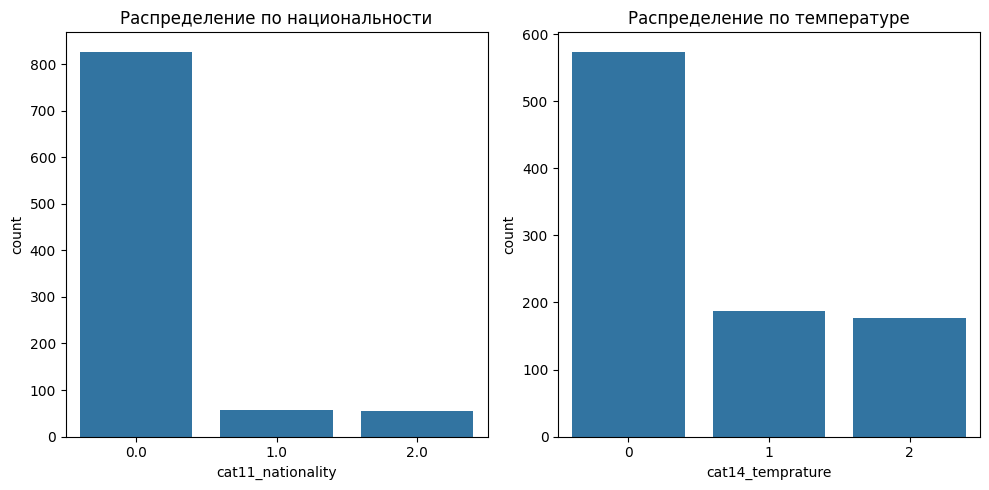

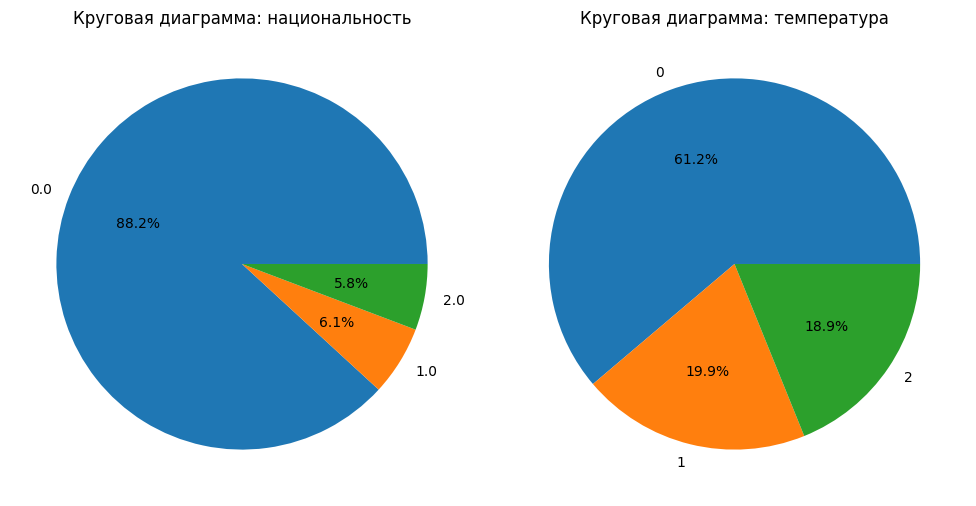

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='cat11_nationality', data=data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏')
plt.subplot(1, 2, 2)
sns.countplot(x='cat14_temprature', data=data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['cat11_nationality'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('–ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞: –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å')
plt.subplot(1, 2, 2)
data['cat14_temprature'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('–ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞: —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞')
plt.tight_layout()
plt.show()